# **Coid 19 Status Tracker with Interactive Visualuzations**

In [84]:
#mount google drive to read uploaded shapefile
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#install geopandas
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-k_p_i1sz
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-k_p_i1sz


#### **Import Dependencies**

In [86]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Markdown as md
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [87]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

#### **Import Theme Templates & Colours palets**

In [88]:
#plotly available templates
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

#### **Plotly Colours** :
###### *aliceblue, antiquewhite, aqua, aquamarine, azure, beige, bisque, black, blanchedalmond, blue, blueviolet, brown, burlywood, cadetblue, chartreuse chocolate, coral, cornflowerblue, cornsilk, crimson, cyan, darkblue, darkcyan, darkgoldenrod, darkgray, darkgrey, darkgreen, darkkhaki, darkmagenta, darkolivegreen, darkorange, darkorchid, darkred, darksalmon, darkseagreen, darkslateblue, darkslategray, darkslategrey, darkturquoise, darkviolet, deeppink, deepskyblue, dimgray, dimgrey, dodgerblue, firebrick, floralwhite, forestgreen, fuchsia, gainsboro, ghostwhite, gold, goldenrod, gray, grey, green, greenyellow, honeydew, hotpink, indianred, indigo, ivory, khaki, lavender, lavenderblush, lawngreen, lemonchiffon, lightblue, lightcoral, lightcyan, lightgoldenrodyellow, lightgray, lightgrey, lightgreen, lightpink, lightsalmon, lightseagreen, lightskyblue, lightslategray, lightslategrey, lightsteelblue, lightyellow, lime, limegreen, linen, magenta, maroon, mediumaquamarine, mediumblue, mediumorchid, mediumpurple, mediumseagreen, mediumslateblue, mediumspringgreen, mediumturquoise, mediumvioletred, midnightblue, mintcream, mistyrose, moccasin, navajowhite, navy, oldlace, olive, olivedrab, orange, orangered, orchid, palegoldenrod, palegreen, paleturquoise, palevioletred, papayawhip, peachpuff, peru, pink, plum, powderblue, purple, red, rosybrown, royalblue, rebeccapurple, saddlebrown, salmon, sandybrown, seagreen, seashell, sienna, silver, skyblue, slateblue, slategray, slategrey, snow, springgreen, steelblue, tan, teal, thistle, tomato, turquoise, violet, wheat, white, whitesmoke, yellow, yellowgreen*

### **Geopandas Colous**
##### *'Grays' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'*

## **Getting Know About the Dataset**

#### Import Datasets

In [89]:
#live covid 19 datset
df_raw = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [90]:
#world geopatial boundaries for plot maps
regions = gpd.read_file("/content/drive/MyDrive/Colab Materials/Geospatial World Boundaries/WB_countries_Admin0_10m.shp")

In [91]:
df_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [92]:
df_raw.shape

(124877, 65)

In [93]:
#last 5 rows
df_raw.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
124872,ZWE,Africa,Zimbabwe,2021-10-15,132285.0,34.0,82.857,4655.0,0.0,3.000,8765.141,2.253,5.490,308.438,0.000,0.199,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4432.0,1327112.0,87.934,0.294,4226.0,0.280,0.02,51.0,tests performed,5674738.0,3208175.0,2466563.0,NaN,20471.0,16890.0,37.60,21.26,16.34,NaN,1119.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
124873,ZWE,Africa,Zimbabwe,2021-10-16,132333.0,48.0,81.571,4657.0,2.0,3.000,8768.321,3.180,5.405,308.571,0.133,0.199,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3063.0,1330175.0,88.137,0.203,4170.0,0.276,0.02,51.1,tests performed,5687958.0,3214178.0,2473780.0,NaN,13220.0,16520.0,37.69,21.30,16.39,NaN,1095.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
124874,ZWE,Africa,Zimbabwe,2021-10-17,132368.0,35.0,81.714,4658.0,1.0,3.000,8770.640,2.319,5.414,308.637,0.066,0.199,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701675.0,3221576.0,2480099.0,NaN,13717.0,17164.0,37.78,21.35,16.43,NaN,1137.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
124875,ZWE,Africa,Zimbabwe,2021-10-18,132368.0,0.0,70.429,4658.0,0.0,2.143,8770.640,0.000,4.667,308.637,0.000,0.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5742988.0,3241469.0,2501519.0,NaN,41313.0,21169.0,38.05,21.48,16.57,NaN,1403.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
124876,ZWE,Africa,Zimbabwe,2021-10-19,132405.0,37.0,55.571,4659.0,1.0,2.000,8773.092,2.452,3.682,308.703,0.066,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [94]:
df_raw.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
98584,SRB,Europe,Serbia,2020-12-30,334991.0,3236.0,3248.286,3163.0,44.0,47.143,48491.624,468.427,470.206,457.860,6.369,6.824,0.73,269.0,38.939,9014.0,1304.822,NaN,NaN,NaN,NaN,14444.0,2283406.0,330.534,2.091,13629.0,1.973,0.238,4.2,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,6908224.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806,NaN,NaN,NaN,NaN
92587,RUS,Europe,Russia,2020-03-25,658.0,163.0,73.000,3.0,2.0,0.429,4.510,1.117,0.500,0.021,0.014,0.003,2.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4427.0,197251.0,1.352,0.030,9164.0,0.063,0.008,125.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.50,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.050,72.58,0.824,NaN,NaN,NaN,NaN
115426,TKM,Asia,Turkmenistan,2021-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41369.0,NaN,NaN,NaN,NaN,6762.0,47.22,6117933.0,12.253,26.9,4.277,2.541,16389.023,NaN,536.783,7.11,NaN,NaN,100.000,7.400,68.19,0.715,NaN,NaN,NaN,NaN
88559,PRY,South America,Paraguay,2021-04-06,224736.0,2073.0,1720.714,4522.0,59.0,51.571,31128.418,287.133,238.338,626.347,8.172,7.143,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5022.0,939112.0,130.077,0.696,5311.0,0.736,0.324,3.1,tests performed,47970.0,46034.0,1936.0,NaN,678.0,427.0,0.66,0.64,0.03,NaN,59.0,64.81,7219641.0,17.144,26.5,6.378,3.833,8827.010,1.7,199.128,8.27,5.0,21.6,79.602,1.300,74.25,0.728,NaN,NaN,NaN,NaN
30691,DNK,Europe,Denmark,2021-01-31,199156.0,377.0,543.286,2126.0,19.0,20.286,34258.671,64.851,93.456,365.713,3.268,3.490,0.68,97.0,16.686,529.0,90.998,NaN,NaN,380.381,65.433,77543.0,13435739.0,2311.206,13.339,112307.0,19.319,0.005,206.7,tests performed,260394.0,176305.0,84089.0,NaN,12677.0,8803.0,4.48,3.03,1.45,NaN,1514.0,70.37,5813302.0,136.520,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.500,80.90,0.940,-203.8,-0.34,7.7,-35.057528


### **Derive World Data From The Dataset**

In [95]:
#derive world data from the dataframe

#filter data
world_all = df_raw[(df_raw['location']=='World')]
world_all = world_all[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated',	'people_fully_vaccinated','population']]


#calculate percentage
world_all['wo_cas_per'] = round((world_all['total_cases'] / world_all['population']) * 100 , 2)
world_all['wo_vc_per'] = round((world_all['people_vaccinated'] / world_all['population']) * 100 , 2)
world_all['wo_fl_vc_per'] = round((world_all['people_fully_vaccinated'] / world_all['population']) * 100 , 2)
world_all['wo_de_per'] = round((world_all['total_deaths'] / world_all['population']) * 100 , 2)

#get the last date data points
world_all = world_all.iloc[:-1,:]
world = world_all.tail(1)


#define neccesery values into the variables
vaccine_percentage_world = np.array(world['wo_vc_per'])[0]
fully_vaccine_percentage_world = np.array(world['wo_fl_vc_per'])[0]
cases_percentage_world = np.array(world['wo_cas_per'])[0]
deaths_percentage_world = np.array(world['wo_de_per'])[0]


#convert neccesery values into the variables
ca = round(np.array(world['total_cases'])[0] / 1000000,1)
de = round(np.array(world['total_deaths'])[0] / 1000000,1)
vc = round(np.array(world['people_vaccinated'])[0] / 1000000,1)
fvc = round(np.array(world['people_fully_vaccinated'])[0] / 1000000,1)


In [96]:
#world dreived data
world_all

,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,wo_cas_per,wo_vc_per,wo_fl_vc_per,wo_de_per
122522,2020-01-22,557.0,0.0,17.0,0.0,NaN,NaN,7.874966e+09,0.00,NaN,NaN,0.00
122523,2020-01-23,655.0,98.0,18.0,1.0,NaN,NaN,7.874966e+09,0.00,NaN,NaN,0.00
122524,2020-01-24,941.0,286.0,26.0,8.0,NaN,NaN,7.874966e+09,0.00,NaN,NaN,0.00
122525,2020-01-25,1434.0,493.0,42.0,16.0,NaN,NaN,7.874966e+09,0.00,NaN,NaN,0.00
122526,2020-01-26,2118.0,684.0,56.0,14.0,NaN,NaN,7.874966e+09,0.00,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
123153,2021-10-14,239609261.0,441402.0,4882117.0,7816.0,3.731613e+09,2.817088e+09,7.874966e+09,3.04,47.39,35.77,0.06
123154,2021-10-15,240072382.0,463121.0,4889368.0,7251.0,3.739546e+09,2.829630e+09,7.874966e+09,3.05,47.49,35.93,0.06
123155,2021-10-16,240405017.0,332635.0,4894513.0,5145.0,3.746677e+09,2.836269e+09,7.874966e+09,3.05,47.58,36.02,0.06
123156,2021-10-17,240706344.0,301327.0,4898674.0,4161.0,3.753032e+09,2.844079e+09,7.874966e+09,3.06,47.66,36.12,0.06


In [97]:
#Summary of on the recent date
world

,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,wo_cas_per,wo_vc_per,wo_fl_vc_per,wo_de_per
123157,2021-10-18,241132266.0,425922.0,4905094.0,6420.0,3.761333e+09,2.855781e+09,7.874966e+09,3.06,47.76,36.26,0.06


In [98]:
#remove world data from the main dataset 
df_raw = pd.DataFrame(df_raw[~(df_raw['continent'].isnull())])

In [99]:
#remove data regarding to recent date

#this recent date we cant use directy for the analysis, becasue this dataset only contain the complete updated data that 2 days before the recent date. therefore we have to change the date)
print("Last Date Data Recorded",df_raw['date'].max())
print(' ')

rec_fully_up_date = df_raw['date'].iloc[-1] #derive fully update date into a variable

#filter data which under the fully complated date
df = pd.DataFrame(df_raw[~(df_raw['date'] == rec_fully_up_date )])

#derive neccessery columns for the further calculatins
df = df[['date','continent',	'location','total_tests','new_tests'	,'total_cases'	,'new_cases'	,'total_deaths'	,'new_deaths', 'total_vaccinations'	,'people_vaccinated'	,'people_fully_vaccinated'	,'population']]

#check after data cleaned
df.tail()

Last Date Data Recorded 2021-10-19
 


,date,continent,location,total_tests,new_tests,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
124871,2021-10-14,Africa,Zimbabwe,1322680.0,4707.0,132251.0,143.0,4655.0,7.0,5654267.0,3200122.0,2454145.0,15092171.0
124872,2021-10-15,Africa,Zimbabwe,1327112.0,4432.0,132285.0,34.0,4655.0,0.0,5674738.0,3208175.0,2466563.0,15092171.0
124873,2021-10-16,Africa,Zimbabwe,1330175.0,3063.0,132333.0,48.0,4657.0,2.0,5687958.0,3214178.0,2473780.0,15092171.0
124874,2021-10-17,Africa,Zimbabwe,NaN,NaN,132368.0,35.0,4658.0,1.0,5701675.0,3221576.0,2480099.0,15092171.0
124875,2021-10-18,Africa,Zimbabwe,NaN,NaN,132368.0,0.0,4658.0,0.0,5742988.0,3241469.0,2501519.0,15092171.0


In [100]:
df.shape

(119025, 13)

In [101]:
for columns in df.columns:
        print(columns)

date
continent
location
total_tests
new_tests
total_cases
new_cases
total_deaths
new_deaths
total_vaccinations
people_vaccinated
people_fully_vaccinated
population


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119025 entries, 0 to 124875
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     119025 non-null  object 
 1   continent                119025 non-null  object 
 2   location                 119025 non-null  object 
 3   total_tests              53660 non-null   float64
 4   new_tests                53513 non-null   float64
 5   total_cases              112297 non-null  float64
 6   new_cases                112288 non-null  float64
 7   total_deaths             101568 non-null  float64
 8   new_deaths               101564 non-null  float64
 9   total_vaccinations       27128 non-null   float64
 10  people_vaccinated        25666 non-null   float64
 11  people_fully_vaccinated  22703 non-null   float64
 12  population               118769 non-null  float64
dtypes: float64(10), object(3)
memory usage: 12.7+ MB


In [103]:
df.isnull().sum()

date                           0
continent                      0
location                       0
total_tests                65365
new_tests                  65512
total_cases                 6728
new_cases                   6737
total_deaths               17457
new_deaths                 17461
total_vaccinations         91897
people_vaccinated          93359
people_fully_vaccinated    96322
population                   256
dtype: int64

## **Pre Processing**

### **Define Dataframes for the further analysis**

### *Country Wise Dataframe*

In [104]:
#list of countries in the dataset
country_count = len(df['location'].unique())

md(f'## *Number of Countries in The Dataset : {country_count}*')

## *Number of Countries in The Dataset : 224*

In [105]:
#filter & group data by location
Ctr_wise = pd.DataFrame(df.groupby(['location']).agg({ 
                                                    'total_cases':'max', 
                                                    'total_deaths':'max', 
                                                    'people_vaccinated':'max',
                                                    'people_fully_vaccinated':'max',
                                                    'population':'max'}).reset_index())

Ctr_wise.head()

,location,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,population
0,Afghanistan,155776.0,7246.0,828601.0,430744.0,39835428.0
1,Albania,178188.0,2829.0,979655.0,857201.0,2872934.0
2,Algeria,205364.0,5873.0,6017036.0,4032942.0,44616626.0
3,Andorra,15367.0,130.0,54312.0,47720.0,77354.0
4,Angola,63012.0,1670.0,3787300.0,1437397.0,33933611.0


### *Continent Wise Dataframe*

In [106]:
Cont_wise = pd.DataFrame(df.groupby(['continent','location']).agg({ 
                                                    'total_cases':'max', 
                                                    'total_deaths':'max', 
                                                    'people_vaccinated':'max',
                                                    'people_fully_vaccinated':'max',
                                                    'population':'max'}).reset_index())



Cont_wise = pd.DataFrame(Cont_wise.groupby('continent').agg({ 
                                                    'total_cases':'sum', 
                                                    'total_deaths':'sum', 
                                                    'people_vaccinated':'sum',
                                                    'people_fully_vaccinated':'sum',
                                                    'population':'sum'}).reset_index())

Cont_wise

,continent,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,population
0,Africa,8438465.0,215669.0,1.065782e+08,7.057231e+07,1.371693e+09
1,Asia,78028663.0,1155130.0,2.558825e+09,1.862157e+09,4.652558e+09
2,Europe,62138139.0,1267856.0,4.347034e+08,4.047448e+08,7.508322e+08
3,North America,54178461.0,1099643.0,3.555766e+08,2.966358e+08,5.928291e+08
4,Oceania,229200.0,2559.0,2.345531e+07,1.842808e+07,4.293680e+07
5,South America,38117860.0,1164360.0,2.821942e+08,2.032436e+08,4.339537e+08


#### *Calculate Percentage Columns*

In [107]:
# vaccination percentage countries

Ctr_wise['vacc_percentage'] = round(Ctr_wise['people_vaccinated'] / Ctr_wise['population'],2)*100
Ctr_wise['Fully_vacc_percentage'] = round(Ctr_wise['people_fully_vaccinated'] / Ctr_wise['population'],2)*100

Ctr_wise['deaths_percentage'] = round(Ctr_wise['total_deaths'] / Ctr_wise['population'],4)*100
Ctr_wise['cases_percentage'] = round(Ctr_wise['total_cases'] / Ctr_wise['population'],2)*100


Ctr_wise.head(5)

,location,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,population,vacc_percentage,Fully_vacc_percentage,deaths_percentage,cases_percentage
0,Afghanistan,155776.0,7246.0,828601.0,430744.0,39835428.0,2.0,1.0,0.02,0.0
1,Albania,178188.0,2829.0,979655.0,857201.0,2872934.0,34.0,30.0,0.10,6.0
2,Algeria,205364.0,5873.0,6017036.0,4032942.0,44616626.0,13.0,9.0,0.01,0.0
3,Andorra,15367.0,130.0,54312.0,47720.0,77354.0,70.0,62.0,0.17,20.0
4,Angola,63012.0,1670.0,3787300.0,1437397.0,33933611.0,11.0,4.0,0.00,0.0


In [108]:
# vaccination percentage of continents

Cont_wise['vacc_percentage'] = round(Cont_wise['people_vaccinated'] / Cont_wise['population'],2)*100
Cont_wise['Fully_vacc_percentage'] = round(Cont_wise['people_fully_vaccinated'] / Cont_wise['population'],2)*100

Cont_wise['deaths_percentage'] = round(Cont_wise['total_deaths'] / Cont_wise['population'],4)*100
Cont_wise['cases_percentage'] = round(Cont_wise['total_cases'] / Cont_wise['population'],2)*100


Cont_wise

,continent,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,population,vacc_percentage,Fully_vacc_percentage,deaths_percentage,cases_percentage
0,Africa,8438465.0,215669.0,1.065782e+08,7.057231e+07,1.371693e+09,8.0,5.0,0.02,1.0
1,Asia,78028663.0,1155130.0,2.558825e+09,1.862157e+09,4.652558e+09,55.0,40.0,0.02,2.0
2,Europe,62138139.0,1267856.0,4.347034e+08,4.047448e+08,7.508322e+08,58.0,54.0,0.17,8.0
3,North America,54178461.0,1099643.0,3.555766e+08,2.966358e+08,5.928291e+08,60.0,50.0,0.19,9.0
4,Oceania,229200.0,2559.0,2.345531e+07,1.842808e+07,4.293680e+07,55.0,43.0,0.01,1.0
5,South America,38117860.0,1164360.0,2.821942e+08,2.032436e+08,4.339537e+08,65.0,47.0,0.27,9.0


# **Exploratory Data Analysis & Visualizations - Global**

## **Summary of Global Covid 19 Status**

In [109]:
#pre-process the current date
Analysis_Date = df_raw['date'].iloc[-2]

title_name = "Summary of Global Covid 19 status as at " + str(Analysis_Date)

values = [['Total Cases','Total Death Cases','Vaccinated People','Fully Vaccinated People'],
          [str(ca)+str('M'), str(de)+str('M') , str(vc)+str('M') ,str(fvc)+str('M') ],
          [str(cases_percentage_world)+str('%'), str(deaths_percentage_world)+str('%'), str(vaccine_percentage_world) +str('%'), str(fully_vaccine_percentage_world)+str('%')]]

fig = go.Figure(data=[go.Table(
                                columnorder = [1,2,3],
                                columnwidth = [40,20,20],
                                header = dict(
                                  values = [['<b>Details</b>'] , ['<b>No of People</b>'],['<b>Percentage Value</b>']],
                                  line_color='darkslategray',
                                  fill_color='royalblue',
                                  align=['center','center','center'],
                                  font=dict(color='white', size=22),
                                  height=70
                                ),
                                cells=dict(
                                  values=values,
                                  line_color='darkslategray',
                                  fill=dict(color=['white', 'white', 'white']),
                                  align=['center', 'center', 'center'],
                                  font_size=20,
                                  height=70)
                                  )
                              ])

fig.update_layout(
     title = title_name,
     title_font_size = 25,
     width = 1400, height = 600)


fig.show()

### **World Vaccination Progress Percentage**

In [110]:
fig = go.Figure(go.Indicator(
                              domain = {'x': [0, 1], 'y': [0, 1]},
                              value = vaccine_percentage_world,
                              mode = "gauge+number+delta",
                              title = {'text': "World Vaccination Progress (At least 1 Dose)"},
                              delta = {'reference':100},
                              gauge = {'axis': {'range': [None, 100]},
                                      'bar': {'color': "darkblue"},
                                      'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 99}}))

fig.show()

### **World Fully Vaccination Progress Percentage**

In [111]:
fig = go.Figure(go.Indicator(
                              domain = {'x': [0, 1], 'y': [0, 1]},
                              value = fully_vaccine_percentage_world,
                              mode = "gauge+number+delta",
                              title = {'text': "World Fully Vaccination Progress"},
                              delta = {'reference':100},
                              gauge = {'axis': {'range': [None, 100]},
                                      'bar': {'color': "orange"},
                                      'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 99}}))

fig.show()

## **Time Line of World Data**

In [112]:
world_all.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,wo_cas_per,wo_vc_per,wo_fl_vc_per,wo_de_per
122522,2020-01-22,557.0,0.0,17.0,0.0,NaN,NaN,7.874966e+09,0.0,NaN,NaN,0.0
122523,2020-01-23,655.0,98.0,18.0,1.0,NaN,NaN,7.874966e+09,0.0,NaN,NaN,0.0
122524,2020-01-24,941.0,286.0,26.0,8.0,NaN,NaN,7.874966e+09,0.0,NaN,NaN,0.0
122525,2020-01-25,1434.0,493.0,42.0,16.0,NaN,NaN,7.874966e+09,0.0,NaN,NaN,0.0
122526,2020-01-26,2118.0,684.0,56.0,14.0,NaN,NaN,7.874966e+09,0.0,NaN,NaN,0.0


### **Time Series Of Covid 19 Positive Cases**

In [113]:
fig = go.Figure()

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_cases'],
     mode = 'lines',
     line=dict(width=0.5, color='yellowgreen'),stackgroup = 'one'))

fig.update_layout(
     title = "Time Series Of Covid 19 Cases",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.update_yaxes(
     title_text = "Cases",
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.show()

### **Time Series Of Covid 19 Deaths**

In [114]:
fig = go.Figure()

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_deaths'],
     mode = 'lines',
     line=dict(width=0.5, color='orangered'),stackgroup = 'one'))

fig.update_layout(
     title = "Time Series Of Covid 19 Death Cases",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.update_yaxes(
     title_text = "Death Cases",
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.show()

### **Time Series Of Covid 19 Vaccination**

In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['people_vaccinated'],
     mode = 'lines',
     line=dict(width=0.5, color='royalblue'),stackgroup = 'one'))

fig.update_layout(
     title = "Time Series Of Covid 19 Vaccination Progress",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.update_yaxes(
     title_text = "Vaccination Count",
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.show()

### **Time Series Of Covid 19 Fully Vaccinations**

In [116]:
fig = go.Figure()

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['people_fully_vaccinated'],
     mode = 'lines',
     line=dict(width=0.5, color='purple'),stackgroup = 'one'))

fig.update_layout(
     title = "Time Series Of Covid 19 Fully Vaccination Progress",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.update_yaxes(
     title_text = "Vaccination Count",
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.show()

### **Deaths vs Positive Cases Time Series**

In [117]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_cases'],
     mode = 'lines',
     name='Positive Cases',
     line=dict(width=2, color='yellowgreen')),secondary_y=False)

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_deaths'],
     mode = 'lines',
     name='Death Cases',
     line=dict(width=2, color='orangered')),secondary_y=True)

fig.update_layout(
     title = "Deaths Cases vs Positive Cases Time Series",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))


fig.update_yaxes(title_text="Total Cases", secondary_y=False)
fig.update_yaxes(title_text="Death Cases", secondary_y=True)

fig.show()

### **Vaccinations Vs Positive Cases Time Series**

In [118]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_cases'],
     mode = 'lines',
     name='Positive Cases',
     line=dict(width=2, color='yellowgreen')),secondary_y=False)

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['people_vaccinated'],
     mode = 'lines',
     name='Vaccination',
     line=dict(width=2, color='royalblue')),secondary_y=True)

fig.update_layout(
     title = "Vaccination vs Positive Cases Time Series",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))



fig.update_yaxes(title_text="Positive Cases", secondary_y=False)
fig.update_yaxes(title_text="Vaccination", secondary_y=True)

fig.show()

### **Vaccinations Vs Deaths Cases Time Series**

In [119]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['people_vaccinated'],
     mode = 'lines',
     name='Vaccination',
     line=dict(width=2, color='royalblue')),secondary_y=False)

fig.add_trace(go.Scatter(
     x= world_all['date'], y = world_all['total_deaths'],
     mode = 'lines',
     name='Death Cases',
     line=dict(width=2, color='orangered')),secondary_y=True)

fig.update_layout(
     title = "Vaccination vs Death Cases Time Series",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620)

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='black'),
     tickfont=dict(family='Calibri', color='black', size=15))

fig.update_yaxes(title_text="Vaccination", secondary_y=False)
fig.update_yaxes(title_text="Death Cases", secondary_y=True)

fig.show()

## **Country Wise Data Analysis & Visualization**

#### **Pre-processing**

In [120]:
#replaced regions country names with corrected one's according to covid 19 datasets country names
regions.replace(to_replace ={"People's Republic of China":'China',
                             'United States of America':'United States',
                             'The Bahamas':'Bahamas',
                             'The Gambia':'Gambia',
                             'Ivory Coast':"Cote d'Ivoire",
                             'Czech Republic':'Czechia',
                             'Democratic Republic of the Congo':'Democratic Republic of Congo',
                             'São Tomé and Príncipe':'Sao Tome and Principe',
                             'Vatican City':'Vatican',
                             'eSwatini':'Eswatini',
                             'Sint Maarten':'Sint Maarten (Dutch part)',
                             'Republic of the Congo':'Congo',
                             'East Timor':'Timor',
                             'Macau':'Macao',
                             'Curaçao':'Curacao',
                             'Pitcairn Islands':'Pitcairn',
                             'Faroe Islands':'Faeroe Islands',
                             'Republic of Macedonia':'North Macedonia',
                             'Federated States of Micronesia':'Micronesia (country)'}, 
                              value =None,inplace=True)

In [121]:
#rename regions column name for merge
regions.rename({'NAME_EN':'location'}, axis=1,inplace=True)

#merege two dataframes ( ctr_wise & regions)
mg_cont = regions.merge(Ctr_wise, on='location', how='left')

#select neccessery columns from the entire dataframe
mg_cont = mg_cont[['location','geometry','total_cases','total_deaths','people_vaccinated','people_fully_vaccinated','vacc_percentage','Fully_vacc_percentage','deaths_percentage','cases_percentage']]

#convert to millions for better visualization 7 understand
mg_cont['total_cases'] = round(mg_cont['total_cases'] / 1000000,2)
mg_cont['people_vaccinated'] = round(mg_cont['people_vaccinated'] / 1000000,2)
mg_cont['people_fully_vaccinated'] = round(mg_cont['people_fully_vaccinated'] / 1000000,2)

In [122]:
#display first 5 rows of pre processed data
mg_cont.head()

,location,geometry,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,vacc_percentage,Fully_vacc_percentage,deaths_percentage,cases_percentage
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",4.24,142999.0,107.98,63.19,39.0,23.0,0.05,2.0
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",2.40,27993.0,25.24,22.93,77.0,70.0,0.09,7.0
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",1.67,37755.0,16.11,14.37,84.0,75.0,0.20,9.0
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",0.51,18834.0,4.36,3.47,37.0,29.0,0.16,4.0
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",2.19,199882.0,17.64,13.88,53.0,42.0,0.60,7.0


## **Countries Total Vaccination Geospatial Visualization (At least 1 Dose)**

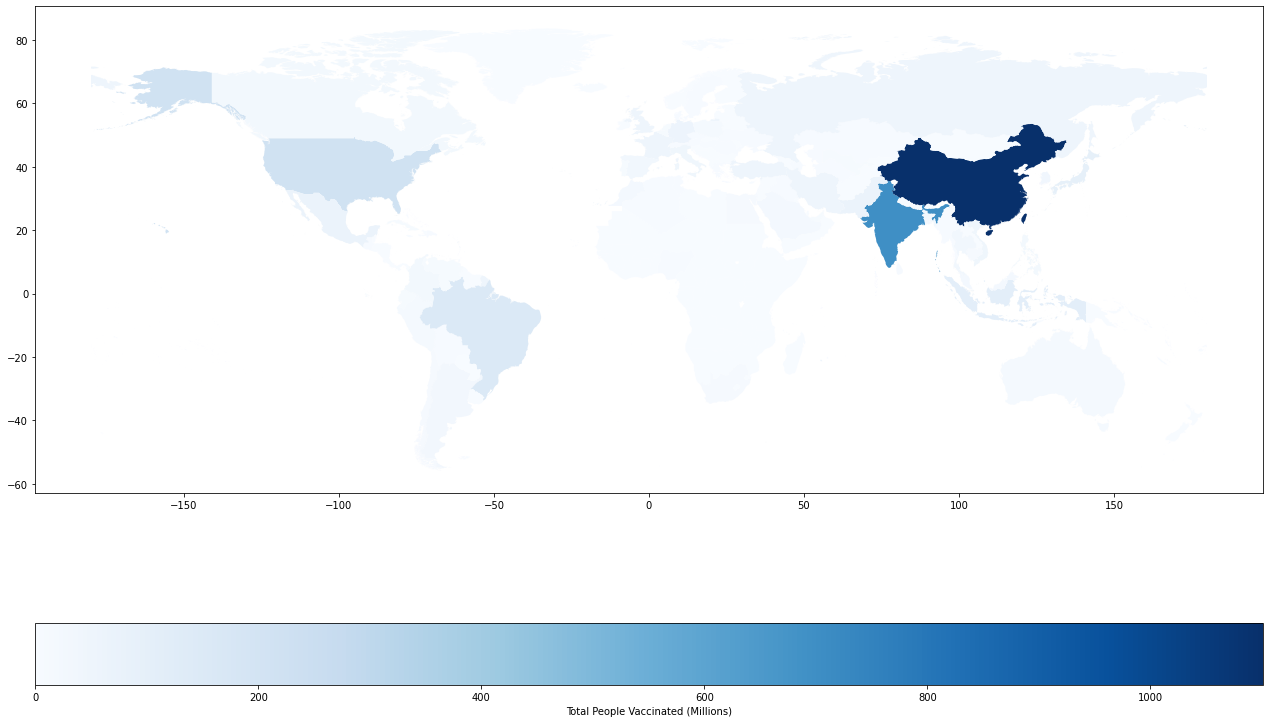

In [123]:
#plot total cases
mg_cont.plot(column='people_vaccinated',
            figsize=(22,16),
            legend=True,
            legend_kwds={'label': "Total People Vaccinated (Millions)",'orientation': "horizontal"},
             cmap='Blues')

## **Countries Fully Vaccination Geospatial Visualization**

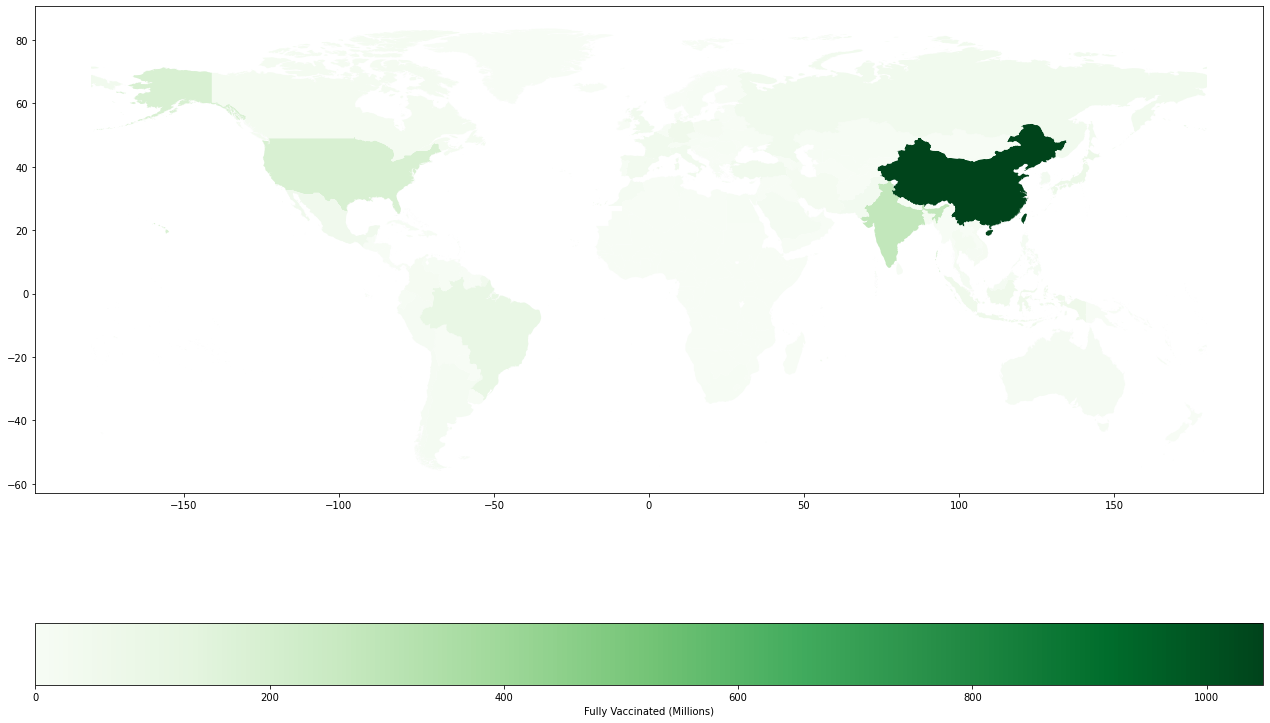

In [124]:
#plot total cases
mg_cont.plot(column='people_fully_vaccinated',
            figsize=(22,16),
            legend=True,
            legend_kwds={'label': "Fully Vaccinated (Millions)",'orientation': "horizontal"},
             cmap='Greens')

### **Top 10 Countries With Highest Vaccination Percentage (At least 1 Dose)**

In [125]:
Vaccination = Ctr_wise.sort_values('vacc_percentage',ascending=False)

Vaccination_filter = Vaccination[['location','people_vaccinated','vacc_percentage',	'Fully_vacc_percentage']]

Vaccination_filter.head(10)

,location,people_vaccinated,vacc_percentage,Fully_vacc_percentage
77,Gibraltar,39972.0,119.0,118.0
160,Pitcairn,47.0,100.0,100.0
211,United Arab Emirates,9524548.0,95.0,85.0
162,Portugal,8975593.0,88.0,86.0
49,Cuba,9713978.0,86.0,60.0
37,Cayman Islands,55780.0,84.0,84.0
40,Chile,16111504.0,84.0,75.0
124,Malta,425719.0,83.0,83.0
90,Iceland,282338.0,82.0,81.0
163,Qatar,2360308.0,81.0,76.0


In [126]:
# visualize source reported times
Vaccination_filter_top_10 = Vaccination_filter.iloc[2:10,:]

fig = px.bar(Vaccination_filter_top_10, x=Vaccination_filter_top_10['location'], 
                                        y=Vaccination_filter_top_10['vacc_percentage'],
                                        title = "Top 10 Countries with Highest Vaccination Percentage")
fig.show()


#### *This dataset is from github respository under oxford unviversity project. it contain first two countries gibralter has vaccinated people more than it's population. so i didnt able to figure out the reason. therefore removed those two countries from the visualization*

### **Countries Total Cases Geospatial Visualization**

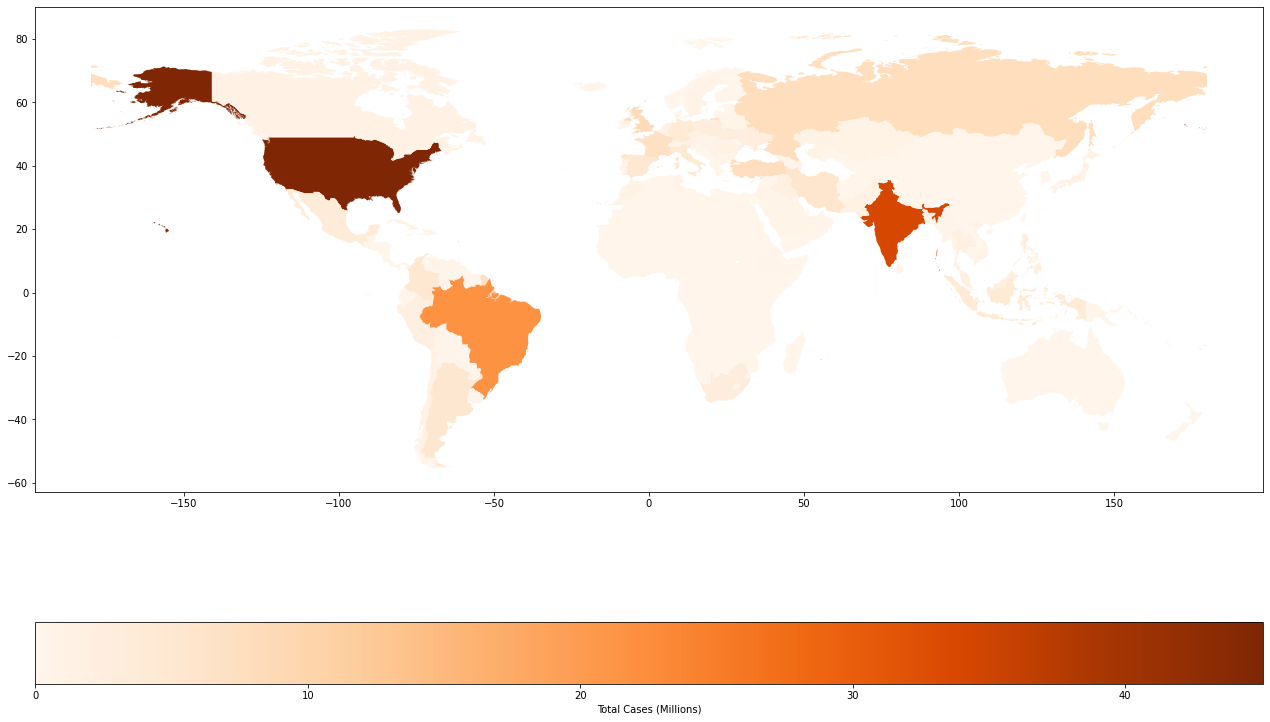

In [127]:
#plot total cases
mg_cont.plot(column='total_cases',
            figsize=(22,16),
            legend=True,
            legend_kwds={'label': "Total Cases (Millions)",'orientation': "horizontal"},
             cmap="Oranges")

### **Top 10 Countries With Highest Covid 19 Cases**

In [128]:
cases = Ctr_wise.sort_values('total_cases',ascending=False)

test_filter_highest = cases[['location','total_cases','cases_percentage']]

test_filter_highest.head(10)

,location,total_cases,cases_percentage
213,United States,45050910.0,14.0
91,India,34094373.0,2.0
27,Brazil,21651910.0,10.0
212,United Kingdom,8537650.0,13.0
165,Russia,7903963.0,5.0
205,Turkey,7683487.0,9.0
70,France,7190716.0,11.0
93,Iran,5796659.0,7.0
7,Argentina,5273463.0,12.0
188,Spain,4988878.0,11.0


### **Top 10 Countries With Highest Covid 19 Cases Percentage**

In [129]:
cases_pr = Ctr_wise.sort_values('cases_percentage',ascending=False)

test_filter_highest_pr = cases_pr[['location','total_cases','cases_percentage']]

test_filter_highest_pr.head(10)

,location,total_cases,cases_percentage
177,Seychelles,21947.0,22.0
133,Montenegro,138047.0,22.0
3,Andorra,15367.0,20.0
74,Georgia,664813.0,17.0
14,Bahrain,276188.0,16.0
172,San Marino,5475.0,16.0
122,Maldives,86211.0,16.0
52,Czechia,1709716.0,16.0
182,Slovenia,308501.0,15.0
97,Israel,1317758.0,15.0


### **Countries Total Deaths Geospatial Visualization**

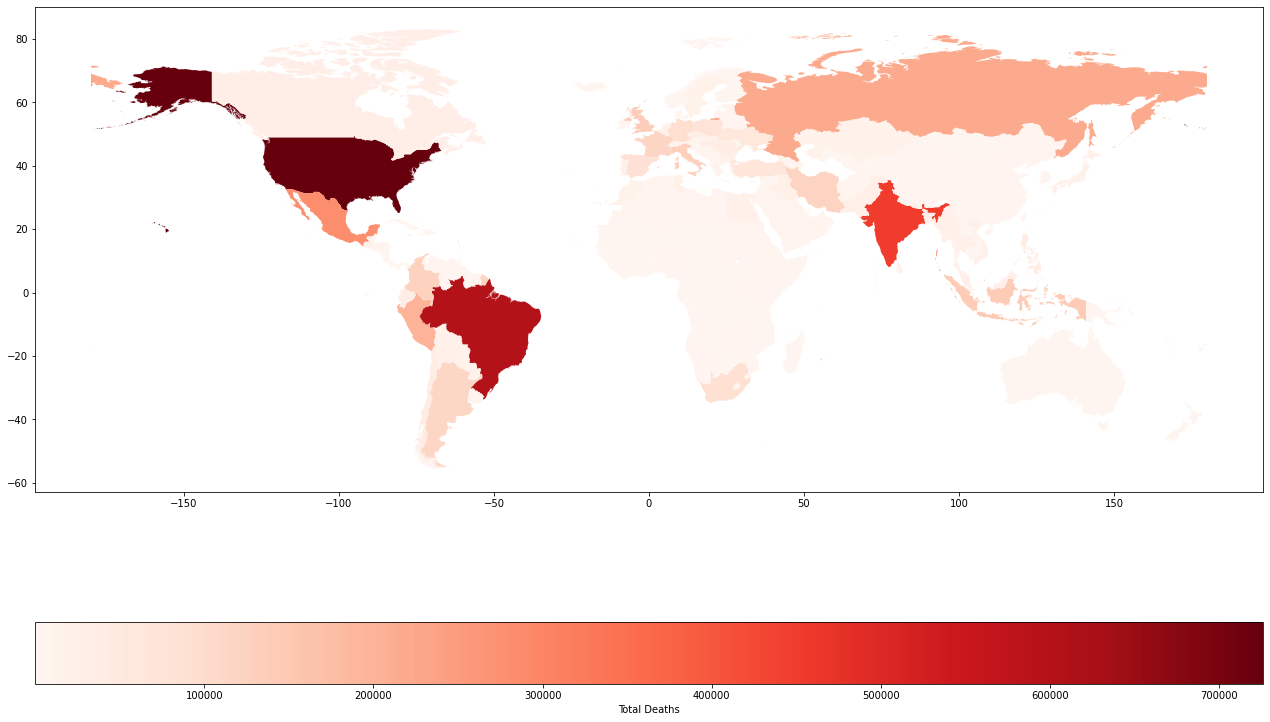

In [130]:
#plot total cases
mg_cont.plot(column='total_deaths',
            figsize=(22,16),
            legend=True,
            legend_kwds={'label': "Total Deaths",'orientation': "horizontal"},
             cmap='Reds')

### **Top 10 Countries With Highest Death Cases**

In [131]:
deaths = Ctr_wise.sort_values('total_deaths',ascending=False)

deaths_highest = deaths[['location','total_deaths','deaths_percentage']]

deaths_highest.head(10)

,location,total_deaths,deaths_percentage
213,United States,725835.0,0.22
27,Brazil,603465.0,0.28
91,India,452454.0,0.03
128,Mexico,284477.0,0.22
165,Russia,220323.0,0.15
158,Peru,199882.0,0.60
92,Indonesia,142999.0,0.05
212,United Kingdom,139042.0,0.20
98,Italy,131585.0,0.22
42,Colombia,126886.0,0.25


### **Top 10 Countries With Highest Death Cases Percentage**

In [132]:
deaths_pr = Ctr_wise.sort_values('deaths_percentage',ascending=False)

deaths_highest_pr = deaths_pr[['location','total_deaths','deaths_percentage']]

deaths_highest_pr.head(10)

,location,total_deaths,deaths_percentage
158,Peru,199882.0,0.60
25,Bosnia and Herzegovina,11201.0,0.34
148,North Macedonia,6964.0,0.33
30,Bulgaria,22488.0,0.33
133,Montenegro,2036.0,0.32
89,Hungary,30402.0,0.32
27,Brazil,603465.0,0.28
52,Czechia,30554.0,0.28
172,San Marino,91.0,0.27
42,Colombia,126886.0,0.25


## **Continents Wise Data Analysis & Visualization**

#### **Preprocessing a Fucntion to Plot Customized Bar Graphs**

In [133]:
#define function to ploting the graphs.

def customized_barchart(Data_frame, Attribute_name_Discrete, Attribute_name_Continious ,max_Colour_name, Rest_colour_name ,Title_name, Yaxis_name, Xaxis_name, Template_name):

  #set axis colours according to theme colour
  if Template_name == 'plotly_dark':

       COL_TICKS = 'white'

  else:
       COL_TICKS = 'black'

  #set max colour effect to maximum value
  list_series = [i for i in Data_frame[Attribute_name_Continious]]
  length = len(list_series)

  colors = [Rest_colour_name,] * length
  colors[list_series.index(max(list_series))] = max_Colour_name

  #setting ploting figure & main propertise 
  fig = go.Figure(data=[go.Bar( x =Data_frame[Attribute_name_Discrete], y= Data_frame[Attribute_name_Continious], marker_color=colors )])

  #add layout styles
  fig.update_layout(title_text=Title_name,
                    title_font_size = 25, legend_font_size = 10,
                    width=1400, height=620,
                    template=Template_name)
  
  #add xaxxes styles
  fig.update_xaxes(title_text = Xaxis_name,
                    title_font=dict(size=15, family='Verdana', color=COL_TICKS),
                    tickfont=dict(family='Calibri', color=COL_TICKS, size=15))
                    
  #add yaxes styles
  fig.update_yaxes(title_text = Yaxis_name,
                    title_font=dict(size=15, family='Verdana', color=COL_TICKS),
                    tickfont=dict(family='Calibri', color=COL_TICKS, size=15))

                    
  fig.show()

### **Contitnents With Total Vaccination Percentage (At least 1 Dose)**

In [134]:
#deaths_percentage	cases_percentage

dfr = Cont_wise
attnd = 'continent'
attnc = 'vacc_percentage'

mcn = 'deepskyblue'
rcn = 'lightslategray'

tn = 'Continents Vs Total Vaccination Percentage (At least 1 Dose)'
yxn = 'Vaccinations Percentage'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Contitnents vs Total Vaccination**

In [135]:
#deaths_percentage	cases_percentage

dfr = Cont_wise
attnd = 'continent'
attnc = 'people_vaccinated'

mcn = 'deepskyblue'
rcn = 'lightslategray'

tn = 'Continents vs Vaccination (At least 1 Dose)'
yxn = 'Vaccinations'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Fully Vaccination Percentage**

In [136]:
#deaths_percentage	cases_percentage

dfr = Cont_wise
attnd = 'continent'
attnc = 'Fully_vacc_percentage'

mcn = 'gold'
rcn = 'limegreen'

tn = 'Continents vs Total Fully Vaccination Percentage'
yxn = 'Fully Vaccinations Percentage'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Total Fully Vaccination**

In [137]:
dfr = Cont_wise
attnd = 'continent'
attnc = 'people_fully_vaccinated'

mcn = 'gold'
rcn = 'limegreen'

tn = 'Continents vs Total Fully Vaccination'
yxn = 'Fully Vaccinations'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Death Cases Percentage**

In [138]:
deaths_con = Cont_wise.sort_values('deaths_percentage',ascending=False)
deaths_con = deaths_con[['continent','total_deaths','deaths_percentage']]
deaths_con

,continent,total_deaths,deaths_percentage
5,South America,1164360.0,0.27
3,North America,1099643.0,0.19
2,Europe,1267856.0,0.17
0,Africa,215669.0,0.02
1,Asia,1155130.0,0.02
4,Oceania,2559.0,0.01


### **Continents vs Death Cases Percentage**

In [139]:
dfr = Cont_wise
attnd = 'continent'
attnc = 'deaths_percentage'

mcn = 'orange'
rcn = 'mediumaquamarine'

tn = 'Continents vs Death Cases Percentage'
yxn = 'Death Cases Percentage'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Total Death Cases**

In [140]:
dfr = Cont_wise
attnd = 'continent'
attnc = 'total_deaths'

mcn = 'orange'
rcn = 'mediumaquamarine'

tn = 'Continents vs Total Death Cases'
yxn = 'Total Death Cases'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Covid 19 Cases Percentage**

In [141]:
dfr = Cont_wise
attnd = 'continent'
attnc = 'cases_percentage'

mcn = 'crimson'
rcn = 'lightslategray'

tn = 'Continents vs Total Covid 19 Cases Percentage'
yxn = 'Cases Percentage'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

### **Continents vs Total Covid 19 Cases**

In [142]:
dfr = Cont_wise
attnd = 'continent'
attnc = 'total_cases'
mcn = 'crimson'
rcn = 'lightslategray'
tn = 'Continents vs Total Covid 19 Cases'
yxn = 'Cases'
xxn =  'Continents'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

## **Sri Lanka's Status During Covid 19 Pandemic**

In [143]:
#derive srilanka's data from the main daatset
sl_df = df[df['location']=='Sri Lanka']

sl_df['people_vaccinated'].fillna(method='ffill',inplace=True)
sl_df['people_fully_vaccinated'].fillna(method='ffill',inplace=True)


sl_df

,date,continent,location,total_tests,new_tests,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
106058,2020-01-27,Asia,Sri Lanka,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,21497306.0
106059,2020-01-28,Asia,Sri Lanka,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,21497306.0
106060,2020-01-29,Asia,Sri Lanka,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,21497306.0
106061,2020-01-30,Asia,Sri Lanka,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,21497306.0
106062,2020-01-31,Asia,Sri Lanka,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,21497306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106684,2021-10-14,Asia,Sri Lanka,5374102.0,7069.0,529755.0,1340.0,13429.0,21.0,27358879.0,14745130.0,12613749.0,21497306.0
106685,2021-10-15,Asia,Sri Lanka,5380615.0,6513.0,530421.0,666.0,13449.0,20.0,27412323.0,14754334.0,12657989.0,21497306.0
106686,2021-10-16,Asia,Sri Lanka,5387588.0,6973.0,531070.0,649.0,13472.0,23.0,27488241.0,14767778.0,12720463.0,21497306.0
106687,2021-10-17,Asia,Sri Lanka,5394735.0,7147.0,531648.0,578.0,13484.0,12.0,27545979.0,14777220.0,12768759.0,21497306.0


In [144]:
sl_df.shape

(631, 13)

In [145]:
sl_df.isnull().sum()

date                         0
continent                    0
location                     0
total_tests                 28
new_tests                   28
total_cases                  0
new_cases                    0
total_deaths                61
new_deaths                  61
total_vaccinations         408
people_vaccinated          367
people_fully_vaccinated    458
population                   0
dtype: int64

### **Pre Proccessing**

In [146]:
#get last date data
sl_summary = sl_df.tail(1)

#claculate percentages
sl_summary['ca_pr_sl'] = round(sl_summary['total_cases'] / sl_summary['population'] * 100,3)
sl_summary['de_pr_sl'] = round(sl_summary['total_deaths'] / sl_summary['population'] * 100,3)
sl_summary['vc_pr_sl'] = round(sl_summary['people_vaccinated'] / sl_summary['population'] * 100,3)
sl_summary['fvc_pr_sl'] = round(sl_summary['people_fully_vaccinated'] / sl_summary['population'] * 100,3)

#drop unwanted columns
sl_summary.drop(['continent','total_vaccinations'],axis=1,inplace=True)

#display proccesed summary data
sl_summary

,date,location,total_tests,new_tests,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,ca_pr_sl,de_pr_sl,vc_pr_sl,fvc_pr_sl
106688,2021-10-18,Sri Lanka,5400601.0,5866.0,532218.0,570.0,13507.0,23.0,14780138.0,12783535.0,21497306.0,2.476,0.063,68.753,59.466


In [147]:
# define function to plot customized line charts

def line_chart(data_li ,x_vr, y_vr, colour_li, titl, x_n, y_n ):
  #defune figure
  fig = go.Figure()

  #define line chart
  fig.add_trace(go.Scatter(
      x= data_li[x_vr], y = data_li[y_vr],
      mode = 'lines',
      line=dict(width=3, color=colour_li)))
  
  #add title details
  fig.update_layout(
      title = titl,
      title_font_size = 25, legend_font_size = 10,
      width = 1400, height = 620,template='plotly_dark')
  
  #add X axis details
  fig.update_xaxes(
      title_text = x_n ,
      title_font=dict(size=15, family='Verdana', color='white'),
      tickfont=dict(family='Calibri', color='white', size=15))
  
  #add Y axis details
  fig.update_yaxes(
      title_text = y_n,
      title_font=dict(size=15, family='Verdana', color='white'),
      tickfont=dict(family='Calibri', color='white', size=15))

  #plot the line chart
  fig.show()

In [148]:
#define neccesery values into the variables
population_sl = np.array(sl_summary['population'])[0]

vaccine_sl = np.array(sl_summary['people_vaccinated'])[0]

fully_vaccine_sl = np.array(sl_summary['people_fully_vaccinated'])[0]

cases_sl = np.array(sl_summary['total_cases'])[0]

deaths_sl = np.array(sl_summary['total_deaths'])[0]

In [149]:
#calculate Covid 19 Total Vaccination Daily Count 

#define list for store proccessed values
c_list = []
p_list = []
diff_list = []
per_list = []

# calculate chanage presentage & value
for l , t in zip(range(0, (len(sl_df['people_vaccinated']) + 1)) , range(1, len(sl_df['people_vaccinated']))):

  cu_value = sl_df['people_vaccinated'].iloc[t]

  pr_value = sl_df['people_vaccinated'].iloc[l]

  diff_val = cu_value - pr_value

  per_val  = round(( diff_val / pr_value) * 100,2)

  c_list.append(cu_value)
  p_list.append(pr_value)
  diff_list.append(diff_val)
  per_list.append(per_val)


# clean data for further calculations
date_dr = list(sl_df['date'].values)
per_list.insert(0,0)
diff_list.insert(0,0)
c_list.insert(0,0)
p_list.insert(0,0)

#create new dataframe
new_df = {'Date':date_dr ,'Current Faccination':c_list ,'Previous Faccination':p_list,'New Faccination' : diff_list, 'Change Rate' : per_list }
new_faccinations = pd.DataFrame(new_df,columns=['Date','Current Faccination','Previous Faccination','New Faccination','Change Rate'])

new_faccinations.tail()

,Date,Current Faccination,Previous Faccination,New Faccination,Change Rate
626,2021-10-14,14745130.0,14731502.0,13628.0,0.09
627,2021-10-15,14754334.0,14745130.0,9204.0,0.06
628,2021-10-16,14767778.0,14754334.0,13444.0,0.09
629,2021-10-17,14777220.0,14767778.0,9442.0,0.06
630,2021-10-18,14780138.0,14777220.0,2918.0,0.02


# **Exploratory Data Analysis & Visualization - Sri Lanka**

## **Sri Lanka Covid 19 Vaccination Progress**

In [150]:
#convert integer values to Millions format & round
def round_values(value_raw):
  return round((value_raw/1000000),2)

#convert variable for do-nut chart 
val_1 = [round_values(vaccine_sl), round_values(population_sl - vaccine_sl)]
val_2 = [round_values(fully_vaccine_sl), round_values(population_sl - fully_vaccine_sl)]


In [151]:
annoatation_text_1 = str(vaccine_sl)
annoatation_text_2 = str(fully_vaccine_sl)

labels_1 = ['Vaccinated(Millions)','Not Vaccinated(Millions)']
labels_2 = ['Fully Vaccinated(Millions)','Not Fully Vaccinated(Millions)']

title_name = "Sri Lanka Covid 19 Vaccination Progress " + str(Analysis_Date)

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles =( "Vaccine", "Fully Vaccine" ))

#add first pie-chart
fig.add_trace(go.Pie(labels=labels_1, 
                     values= val_1, 
                     name="Vaccination (at least 1 dose)",
                     marker=dict(colors=['#2d8cff','#727274'])),
                     1, 1)

#add first pie-chart
fig.add_trace(go.Pie(labels=labels_2,
                     values= val_2,
                     name="Fully Vaccination",
                     marker=dict(colors=['#ff00eb','#727274'])),
                     1, 2)


# use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, 
                  hoverinfo="label+value",
                  hoverlabel=dict(font_size=20),
                  textfont_size=20,
                  showlegend=False)

# update other propertise
fig.update_layout(
    title_text=title_name,
    title_font_size = 25,
    template='plotly_dark',
    width = 1400, 
    height = 620,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='At Least 1 Dose <br>'+ annoatation_text_1, x=0.23, y=0.435, font_size=24, font_color='white' ,showarrow=False,),
                 dict(text='Fully Vaccination <br>'+annoatation_text_2, x=0.78, y=0.435, font_size=24, font_color='white',showarrow=False)])


fig.show()

## **Sri Lanka Covid 19 Tests Time Series**

In [152]:
dataset_line_chart = sl_df
x_line_chart = 'date'
y_line_chart = 'total_tests'
colour_line_chart = 'limegreen'
title_line_chart = 'Sri Lanka Covid 19 Tests Time Series'
xname_line_chart = 'Date'
yname_line_chart = 'Total Tests'

line_chart(dataset_line_chart, x_line_chart, y_line_chart, colour_line_chart, title_line_chart, xname_line_chart, yname_line_chart  ) 

## **Covid 19 Daily Tests Count In Sri Lanka**

In [153]:
#covid 19 test daily count

dfr = sl_df
attnd = 'date'
attnc = 'new_tests'

mcn = 'red'
rcn = 'limegreen'

tn = 'Covid 19 Daily Tests In Sri Lanka'
yxn = 'Tests'
xxn =  'Date'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

## **Sri Lanka Covid 19 Positive Cases Time Series**

In [154]:
dataset_line_chart = sl_df
x_line_chart = 'date'
y_line_chart = 'total_cases'
colour_line_chart = 'gold'
title_line_chart = 'Sri Lanka Covid 19 Positive Cases Time Series'
xname_line_chart = 'Date'
yname_line_chart = 'Total Positive Cases'

line_chart(dataset_line_chart, x_line_chart, y_line_chart, colour_line_chart, title_line_chart, xname_line_chart, yname_line_chart  ) 

## **Covid 19 Positive cases Daily count In Sri Lanka**

In [155]:
#Covid 19 Positive cases day by day count

dfr = sl_df
attnd = 'date'
attnc = 'new_cases'

mcn = 'gold'
rcn = 'gold'

tn = 'Covid 19 Positive cases Daily count In Sri Lanka'
yxn = 'Tests'
xxn =  'Date'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

## **Sri Lanka Covid 19 Death Cases Time Series**

In [156]:
dataset_line_chart = sl_df
x_line_chart = 'date'
y_line_chart = 'total_deaths'
colour_line_chart = 'red'
title_line_chart = 'Sri Lanka Covid 19 Death Cases Time Series'
xname_line_chart = 'Date'
yname_line_chart = 'Total Death Cases'

line_chart(dataset_line_chart, x_line_chart, y_line_chart, colour_line_chart, title_line_chart, xname_line_chart, yname_line_chart  )

## **Covid 19 Death Cases Daily Count In Sri Lanka**

In [157]:
dfr = sl_df
attnd = 'date'
attnc = 'new_deaths'

mcn = '#ff0000'
rcn = '#ff0000'

tn = 'Covid 19 Death Cases Daily Count In Sri Lanka'
yxn = 'Deaths'
xxn =  'Date'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

## **Sri Lanka Covid 19 Vaccination (at least 1 Dose) Time Series**

In [158]:
dataset_line_chart = sl_df
x_line_chart = 'date'
y_line_chart = 'people_vaccinated'
colour_line_chart = 'deepskyblue'
title_line_chart = 'Sri Lanka Covid 19 Vaccination (at least 1 Dose) Time Series'
xname_line_chart = 'Date'
yname_line_chart = 'Total Vaccinations'

line_chart(dataset_line_chart, x_line_chart, y_line_chart, colour_line_chart, title_line_chart, xname_line_chart, yname_line_chart)

## **Covid 19 Total Vaccination Daily Count In Sri Lanka**

In [159]:
dfr = new_faccinations
attnd = 'Date'
attnc = 'New Faccination'

mcn = 'deepskyblue'
rcn = 'deepskyblue'

tn = 'Covid 19 Total Vaccination Daily Count In Sri Lanka'
yxn = 'New Faccinations'
xxn =  'Date'
tmpn = 'plotly_dark'

customized_barchart(dfr, attnd, attnc, mcn, rcn, tn, yxn, xxn, tmpn)

## **Sri Lanka Covid 19 Fully Vaccination Time Series**

In [160]:
dataset_line_chart = sl_df
x_line_chart = 'date'
y_line_chart = 'people_fully_vaccinated'
colour_line_chart = 'orchid'
title_line_chart = 'Sri Lanka Covid 19 Fully Vaccination Time Series'
xname_line_chart = 'Date'
yname_line_chart = 'Total Fully Vaccinations'

line_chart(dataset_line_chart, x_line_chart, y_line_chart, colour_line_chart, title_line_chart, xname_line_chart, yname_line_chart)

## **Vaccination vs Positive Cases Time Series - Sri Lanka**

In [161]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
     x= sl_df['date'], y = sl_df['people_vaccinated'],
     mode = 'lines',
     name='Vaccination',
     line=dict(width=3, color='royalblue')),secondary_y=False)

fig.add_trace(go.Scatter(
     x= sl_df['date'], y = sl_df['total_cases'],
     mode = 'lines',
     name='Death Cases',
     line=dict(width=3, color='gold')),secondary_y=True)

fig.update_layout(
     title = "Vaccination vs Positive Cases Time Series - Sri Lanka",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620,
     template='plotly_dark')

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='white'),
     tickfont=dict(family='Calibri', color='white', size=15))

fig.update_yaxes(title_text="Vaccination", secondary_y=False)
fig.update_yaxes(title_text="Death Cases", secondary_y=True,)

fig.show()

## **Vaccination vs Death Cases Time Series - Sri Lanka**

In [162]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
     x= sl_df['date'], y = sl_df['people_vaccinated'],
     mode = 'lines',
     name='Vaccination',
     line=dict(width=3, color='royalblue')),secondary_y=False)

fig.add_trace(go.Scatter(
     x= sl_df['date'], y = sl_df['total_deaths'],
     mode = 'lines',
     name='Death Cases',
     line=dict(width=3, color='red')),secondary_y=True)

fig.update_layout(
     title = "Vaccination vs Death Cases Time Series Sri Lanka",
     title_font_size = 25, legend_font_size = 10,
     width = 1400, height = 620,
     template='plotly_dark')

fig.update_xaxes(
     title_text = 'Year',
     title_font=dict(size=15, family='Verdana', color='white'),
     tickfont=dict(family='Calibri', color='white', size=15))

fig.update_yaxes(title_text="Vaccination", secondary_y=False)
fig.update_yaxes(title_text="Death Cases", secondary_y=True,)

fig.show()